In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
DATAFRAME = pd.read_csv('../Dataset/winequality-red.csv')

# Padronização dos dados 

In [3]:
standar_scaler = StandardScaler()
df = pd.DataFrame(standar_scaler.fit_transform(DATAFRAME),columns = DATAFRAME.columns)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


# Detecção da Quantidade de Clusters

In [5]:
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

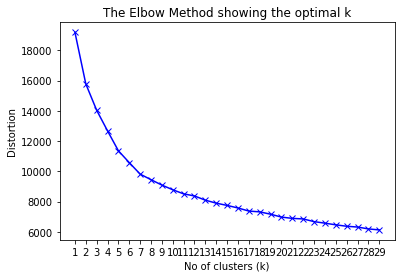

In [6]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(K)
plt.show()

# Treinamento 

In [7]:
modelo_kmeans = KMeans(init='random',n_clusters=7)
modelo_kmeans.fit(df)

KMeans(init='random', n_clusters=7)

# Visualização dos Clusters

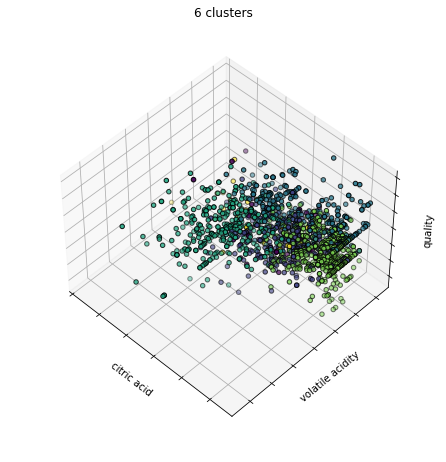

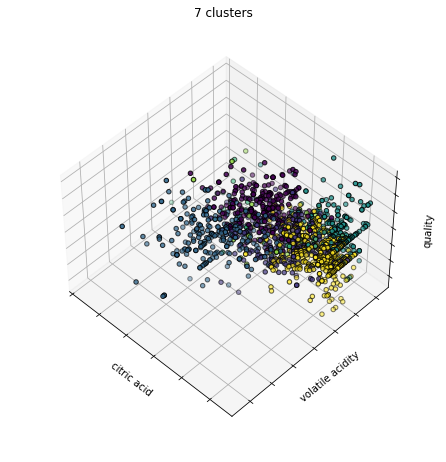

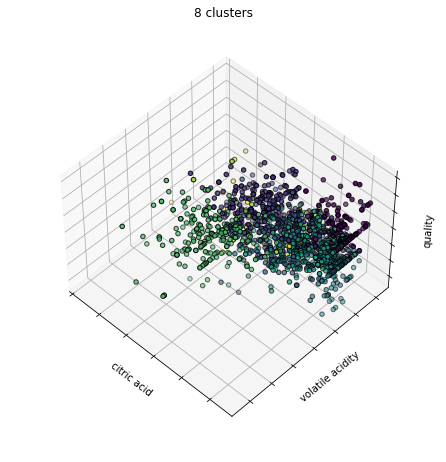

In [8]:
estimators = [('k_means_6', KMeans(n_clusters=6, init='k-means++')),
              ('k_means_7', KMeans(n_clusters=7, init='k-means++')),
              ('k_means_8', KMeans(n_clusters=8, init='random'))]

fignum = 1
titles = ['6 clusters', '7 clusters', '8 clusters']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(df)
    labels = est.labels_

    ax.scatter(df.values[:, 2], df.values[:, 0], df.values[:, 11], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('citric acid')
    ax.set_ylabel('volatile acidity')
    ax.set_zlabel('quality')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1